In [ ]:

# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltz
from sklearn.model_selection import train_test_split


In [ ]:
data=pd.read_csv("kidney_disease.csv")

In [ ]:
data = data.sample(frac = 1)
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
300,300,45.0,60.0,1.020,0.0,0.0,normal,normal,NaN,NaN,...,43,9200,5.8,no,no,no,good,no,no,notckd
63,63,46.0,70.0,1.015,1.0,0.0,abnormal,normal,notpresent,notpresent,...,27,NaN,NaN,no,no,no,good,no,yes,ckd
278,278,48.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,44,9400,6.4,no,no,no,good,no,no,notckd
351,351,29.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,40,9900,4.7,no,no,no,good,no,no,notckd
163,163,46.0,80.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,27,8100,3.2,yes,no,no,poor,no,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,285,66.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,41,5300,5.9,no,no,no,good,no,no,notckd
137,137,45.0,60.0,1.010,2.0,0.0,normal,abnormal,present,notpresent,...,29,9200,NaN,yes,yes,no,good,no,no,ckd
319,319,30.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,good,no,no,notckd
104,104,55.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,no,poor,yes,no,ckd


In [ ]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


# Data Preprocessing

In [ ]:

# dropping  the id column
data.drop('id', axis = 1, inplace = True)

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 300 to 383
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    o

In [ ]:
for i in data.columns:
  print(i)
  print(data[i].unique())
  print("********************")

age
[45. 46. 48. 29.  7. 47. 35. 54. nan 39. 60. 17. 50. 73. 53. 76. 58.  2.
 71. 52. 15. 57. 51. 65. 33. 43. 37. 74. 36. 82. 70. 38. 59. 63. 75. 68.
 44. 23. 34. 67. 41. 12.  5. 28. 55. 72. 80. 61. 56. 11. 62. 66. 27. 64.
 32.  8.  6. 42. 19. 69. 30. 24. 79.  3. 20. 25. 26. 21. 83. 40.  4. 49.
 22. 81. 14. 90. 78.]
********************
bp
[ 60.  70.  80.  50.  90.  nan 100. 110. 120. 180. 140.]
********************
sg
[1.02  1.015 1.01  1.025   nan 1.005]
********************
al
[ 0.  1.  4. nan  3.  2.  5.]
********************
su
[ 0. nan  4.  3.  2.  5.  1.]
********************
rbc
['normal' 'abnormal' nan]
********************
pc
['normal' nan 'abnormal']
********************
pcc
[nan 'notpresent' 'present']
********************
ba
[nan 'notpresent' 'present']
********************
bgr
[114. 150. 112.  83. 160.  nan 124. 104. 233. 219.  86. 123. 105. 490.
  95.  91. 213.  92. 251. 118. 138.  94. 253.  93. 139. 134. 100.  81.
 109. 132. 122.  99.  82. 103. 140. 171.  76.  70. 113. 

In [ ]:
data.replace({'\t':np.nan , '\t43':43,'\t6200':6200 , '\t8400':8400, '\t?':np.nan,'ckd\t':"ckd","\tyes":"yes","\tno":"no"," yes":"yes"},inplace=True)

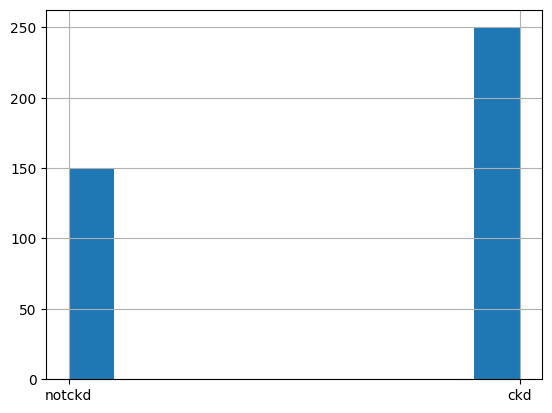

In [ ]:
import matplotlib.pyplot as plt
data['classification'].hist()
plt.show()

In [ ]:
for i in data.columns:
  if data[i].dtypes == "object":
    for j in range(len(data[i].unique())):
      data[i].replace({data[i].unique()[j]:j},inplace=True)

In [ ]:
data.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                  int64
pcc                 int64
ba                  int64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int64
wc                  int64
rc                  int64
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

In [ ]:
x = data.drop("classification",axis=1)
y = data["classification"]

In [ ]:
for i in x.columns:
  x[i].fillna(x[i].mean(),inplace=True)

In [ ]:
x.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

# SMOTE

In [ ]:
import pandas as pd
from sklearn.utils import resample
import collections
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x,y=oversample.fit_resample(x,y)
counter=collections.Counter(y)
print(counter)

counter=collections.Counter(x)
print(counter)



Counter({0: 250, 1: 250})
Counter({'age': 1, 'bp': 1, 'sg': 1, 'al': 1, 'su': 1, 'rbc': 1, 'pc': 1, 'pcc': 1, 'ba': 1, 'bgr': 1, 'bu': 1, 'sc': 1, 'sod': 1, 'pot': 1, 'hemo': 1, 'pcv': 1, 'wc': 1, 'rc': 1, 'htn': 1, 'dm': 1, 'cad': 1, 'appet': 1, 'pe': 1, 'ane': 1})


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

# Classifier Algorithms

In [ ]:
aucscores=[]
precvalues=[]
recallvalues=[]
accuracies=[]

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,roc_auc_score,precision_score, recall_score,accuracy_score

k = 10# no of nearest neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Using the test results, make predictions.
y_predk = knn.predict(X_test)

accuracy=accuracy_score(y_test,y_predk)
print("Accuracy:",accuracy)
cls_score = classification_report(y_test, y_predk)
print(cls_score)
auck = roc_auc_score(y_test, y_predk)

print(auck)
print(accuracy)



Accuracy: 0.872
              precision    recall  f1-score   support

           0       0.79      0.98      0.88        58
           1       0.98      0.78      0.87        67

    accuracy                           0.87       125
   macro avg       0.89      0.88      0.87       125
weighted avg       0.89      0.87      0.87       125

0.8794390118373648
0.872


# **Logistics**

In [ ]:

from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



lr = LogisticRegression()
# On the practise set, train the model.
lr.fit(X_train, y_train)

# Using the test results, make predictions.
y_predlr = lr.predict(X_test)

accuracy=accuracy_score(y_test,y_predlr)
print("Accuracy:",accuracy)

Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ANN

In [ ]:
import tensorflow as tf
from tensorflow import keras as k
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_auc_score,precision_score, recall_score,f1_score
#building model
model = Sequential()

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_2.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
# On the practise set, train the model.
model_2.fit(X_train,y_train)
loss, accuracy = model_2.evaluate(X_test, y_test)


 #Using the test results, make predictions.
y_predANN = model_2.predict(X_test)

# Calculating the AUC score
auc_score = roc_auc_score(y_test, y_predANN)

# Printing the results
print("Accuracy:", accuracy)
print("AUC Score:", auc_score)

y_predANN_binary = np.where(y_predANN >= 0.5, 1, 0)
precision = precision_score(y_test, y_predANN_binary)
recall = recall_score(y_test, y_predANN_binary)
f1 = f1_score(y_test, y_predANN_binary)
aucscores.append(auc_score*100)
precvalues.append(precision*100)
recallvalues.append(recall*100)
accuracies.append(accuracy*100)
print("F1",f1)

4/4 [==============================] - 0s 2ms/step
Accuracy: 0.5040000081062317
AUC Score: 0.5149253731343283
F1 0.5373134328358209


C5.0 **ALGORITHM**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Defining  the C5.0 (J48) classifier
c50 = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Training the model
c50.fit(X_train, y_train)

# Using the test results, make predictions.
y_pred = c50.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
cls_score = classification_report(y_test, y_pred)
print(cls_score)
auc = metrics.roc_auc_score(y_test, y_pred)

print(auc)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
aucscores.append(auc*100)
precvalues.append(precision*100)
recallvalues.append(recall*100)
accuracies.append(accuracy*100)

Accuracy: 0.992
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        58
           1       0.99      1.00      0.99        67

    accuracy                           0.99       125
   macro avg       0.99      0.99      0.99       125
weighted avg       0.99      0.99      0.99       125

0.9913793103448275


LSVM PENALTY **L1**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report,precision_score, recall_score
target_var = "classification"
predictor_vars = list(data.columns)
predictor_vars.remove(target_var)

 # Transform the target variable to binary (0 or 1) format.
data[target_var] = pd.factorize(data[target_var])[0]

# Create an LSVM model with a lambda value of 0.5 and the L1 penalty.
model2 = LinearSVC(penalty='l1', dual=False, C=0.5, max_iter=10000)

# On the practise set, train the model.
model2.fit(X_train, y_train)

# Using the test results, make predictions.
y_predl1 = model2.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_predl1)
print(accuracy)


cls_score = classification_report(y_test, y_predl1)
print(cls_score)

auc = metrics.roc_auc_score(y_test, y_predl1)

print(auc)
aucscores.append(auc*100)
precision = precision_score(y_test, y_predl1, average='macro')
recall = recall_score(y_test, y_predl1, average='macro')

precvalues.append(precision*100)
recallvalues.append(recall*100)
accuracies.append(accuracy*100)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        67

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125

1.0


LSVM **PENALTY** L2

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report,precision_score, recall_score
target_var = "classification"
predictor_vars = list(data.columns)
predictor_vars.remove(target_var)

# Transform the target variable to binary (0 or 1) format.
data[target_var] = pd.factorize(data[target_var])[0]



# Create an LSVM model with a lambda value of 0.5 and the L2 penalty.
model = LinearSVC(penalty='l2', dual=False, C=0.5, max_iter=10000)

# On the practise set, train the model.
model.fit(X_train, y_train)

# Using the test results, make predictions.
y_predl2 = model.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_predl2)
print(accuracy)


cls_score = classification_report(y_test, y_predl2)
print(cls_score)

auc2 = metrics.roc_auc_score(y_test, y_predl2)

print(auc2)

precision = precision_score(y_test, y_predl2, average='macro')
recall = recall_score(y_test, y_predl2, average='macro')
aucscores.append(auc2*100)

precvalues.append(precision*100)
recallvalues.append(recall*100)
accuracies.append(accuracy*100)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        67

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125

1.0


Random Tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.model_selection import train_test_split



#Create a 50-tree random forest classifier.
rfc = RandomForestClassifier(n_estimators=50)

# On the practise set, train the model.
rfc.fit(X_train, y_train)

# Using the test results, make predictions.

y_predr = rfc.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_predr)
print('Accuracy:', accuracy)
cls_score = classification_report(y_test, y_predr)
print(cls_score)
auc = metrics.roc_auc_score(y_test, y_predr)

print(auc)

precision = precision_score(y_test, y_predr, average='macro')
recall = recall_score(y_test, y_predr, average='macro')
aucscores.append(auc*100)
precvalues.append(precision*100)
recallvalues.append(recall*100)
accuracies.append(accuracy*100)

Accuracy: 0.992
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.99      0.99        67

    accuracy                           0.99       125
   macro avg       0.99      0.99      0.99       125
weighted avg       0.99      0.99      0.99       125

0.9925373134328358


In [ ]:
print(accuracies)

[50.40000081062317, 99.2, 100.0, 100.0, 99.2]


AUC Performance Curve

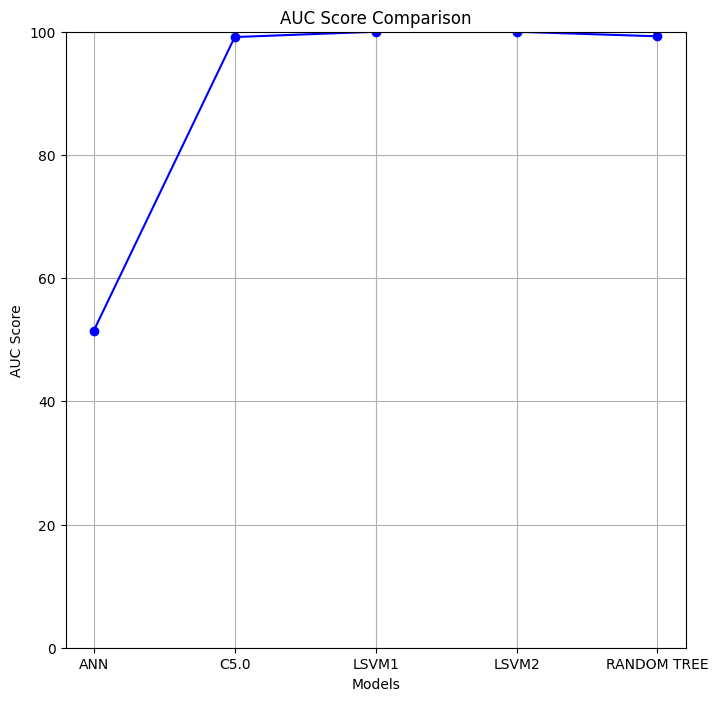

In [ ]:
import matplotlib.pyplot as plt
models=['ANN','C5.0','LSVM1','LSVM2','RANDOM TREE']

plt.figure(figsize=(8,8))
plt.plot(models, aucscores, marker='o', color='blue')
plt.xlabel('Models')
plt.ylabel('AUC Score')
plt.title('AUC Score Comparison')
plt.ylim(0.0, 100.0)
plt.grid(True)
plt.show()







AUC Bar Graph

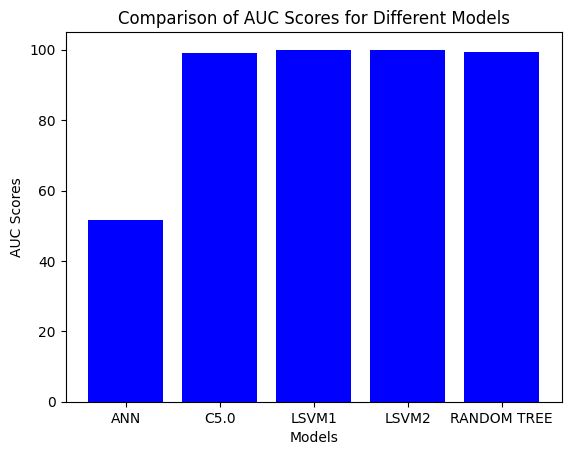

In [ ]:
import matplotlib.pyplot as plt
plt.bar(models, aucscores, color='blue')

# Add axis labels and title
plt.xlabel("Models")
plt.ylabel("AUC Scores")
plt.title("Comparison of AUC Scores for Different Models")

# Display the plot
plt.show()

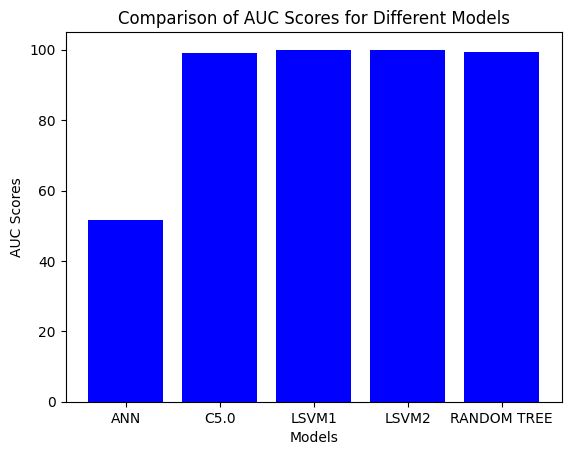

<Figure size 1000x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.bar(models, aucscores, color='blue')

# Add axis labels and title
plt.xlabel("Models")
plt.ylabel("AUC Scores")
plt.title("Comparison of AUC Scores for Different Models")
fig = plt.figure(figsize=(10, 6))

# Display the plot
plt.show()

 Comparison of precision, recall and accuracy for all 5 classifiers with SMOTE and full features.

---



In [ ]:
print(accuracies)
print(precvalues)
print(recallvalues)


[50.40000081062317, 99.2, 100.0, 100.0, 99.2]
[53.73134328358209, 99.26470588235294, 100.0, 100.0, 99.15254237288136]
[53.73134328358209, 99.13793103448276, 100.0, 100.0, 99.25373134328358]


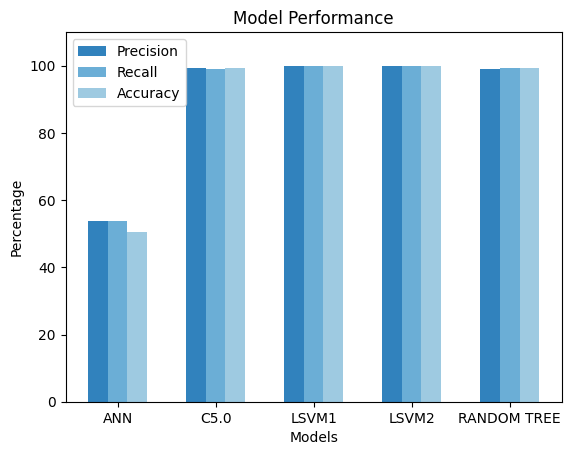

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = range(len(models))
plt.bar(x, precvalues, width=0.2, label='Precision',color='#3182bd')
plt.bar([i + 0.2 for i in x], recallvalues, width=0.2, label='Recall',color='#6baed6')
plt.bar([i + 0.4 for i in x], accuracies, width=0.2, label='Accuracy',color='#9ecae1')
plt.xticks([i + 0.2 for i in x], models)
plt.legend()
plt.title('Model Performance')
plt.xlabel('Models')
plt.ylabel('Percentage')
plt.ylim(0, 110)

plt.show()